In [1]:
%matplotlib notebook

import matplotlib

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [79]:
def load_file(filename):
    with open(filename, 'r') as infile:
        foo = np.fromfile(infile, dtype=np.uint32)

    with open(filename, 'r') as infile:
        bar = np.fromfile(infile, dtype=np.float32)

    header = foo[:4]
    body = bar[4:]
    
    height, width, channels = header[1], header[2], header[3]

    body = body.reshape(height, width, channels)
    
    return body


def get_coords(height, width):
    x, y = np.meshgrid(np.arange(0.0, width, 1.0), np.arange(0.0, height, 1.0))
    z = np.float32([0.0] * (height * width))
    z = z.reshape(height, width)
    
    x = x / height
    y = y / width
    
    return x, y, z


def subsample(x, height, width, skip=1):
    return np.expand_dims(x[::skip,::skip], -1)


def get_points(filename, skip=40):
    
    body = load_file(filename)
    h, w, c = body.shape
    
    body = body / (np.expand_dims(body[:,:,-1], -1) + 1e-8)
    
    
    norms = body[:,:,0] ** 2 + body[:,:,1] ** 2 + body[:,:,2] ** 2
    
    eps = 1e-5
    big = 1e1

    body[norms > big,0] = 0.0
    body[norms > big,1] = 0.0
    body[norms > big,2] = 0.0
    body[norms < eps] = 0.0
    body[norms < eps] = 0.0
    body[norms < eps] = 0.0
    
    x, y, z = get_coords(h, w)
    u, v, w = body[:,:,0], body[:,:,1], body[:,:,2]
    
    return body, [subsample(coord, h, w, skip) for coord in [x, y, z, u, v, w]]


def plot(x, y, z, u, v, w):
    ax = plt.figure().gca(projection='3d')
    ax.quiver(x, y, z, u, v, w, arrow_length_ratio=0.02)

    plt.show()

[ 8.0448510e-03 -1.4059716e-02  7.0282008e-04  9.9997431e-01]
[0. 0. 0. 0.]
[ 1.6608973e-06 -3.3355481e-03  6.4837923e-07  1.0000000e+00]
[0.        0.        0.        1.0000074]


<IPython.core.display.Javascript object>


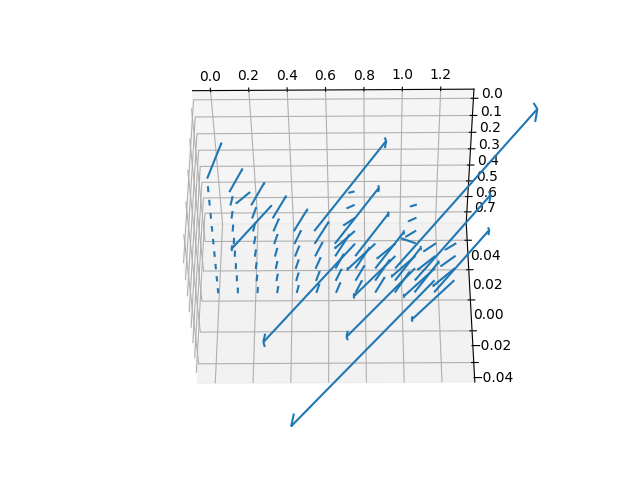

[[[3.9900593e-11]
  [1.1815711e-10]
  [2.7453043e-10]
  ...
  [1.7361112e-05]
  [1.7361112e-05]
  [1.7361112e-05]]

 [[2.8510252e-10]
  [3.6341880e-10]
  [5.1983945e-10]
  ...
  [1.7361112e-05]
  [1.7361112e-05]
  [1.7361112e-05]]

 [[7.7727641e-10]
  [8.5562557e-10]
  [1.0121136e-09]
  ...
  [1.7361112e-05]
  [1.7361112e-05]
  [1.7361112e-05]]

 ...

 [[4.3928656e-05]
  [4.3928736e-05]
  [4.3928911e-05]
  ...
  [6.8713751e-05]
  [6.8776033e-05]
  [6.8838381e-05]]

 [[4.4076078e-05]
  [4.4076158e-05]
  [4.4076318e-05]
  ...
  [6.8861176e-05]
  [6.8923458e-05]
  [6.8985806e-05]]

 [[4.4223743e-05]
  [4.4223823e-05]
  [4.4223983e-05]
  ...
  [6.9008849e-05]
  [6.9071131e-05]
  [6.9133479e-05]]]
[[[ 8.04485101e-03 -1.40597159e-02  7.02820078e-04  9.99974310e-01]
  [-4.44845250e-03  2.59792153e-03 -1.29804233e-04  1.00000477e+00]]

 [[ 8.41695582e-04 -4.45558503e-03  7.32896733e-05  9.99997318e-01]
  [ 7.66387768e-03 -1.35518098e-02  2.22114919e-04  9.99991834e-01]]

 [[ 4.44056204e-04 -3.

In [83]:
filename = '/mnt/d/games/Grand Theft Auto V/cap/2018_07_24_01_13_27/00003267_velocity.raw'
scale = 10.0
skip = 64

body, (x, y, z, u, v, w) = get_points(filename, skip)


print(body[0,0])
print(body[0,-2])
print(body[-1,0])
print(body[-1,-1])


plot(x, y, z, scale * u, scale * v, scale * w)

print(norms)
print(body[:10,:2])
